In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (1)\uber-raw-data-sep14.csv")
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [12]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])


In [14]:
data["Day"] = data["Date/Time"].dt.day
data["Weekday"] = data["Date/Time"].dt.weekday
data["Hour"] = data["Date/Time"].dt.hour
print(data.head())


            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


<Axes: xlabel='Day', ylabel='Count'>

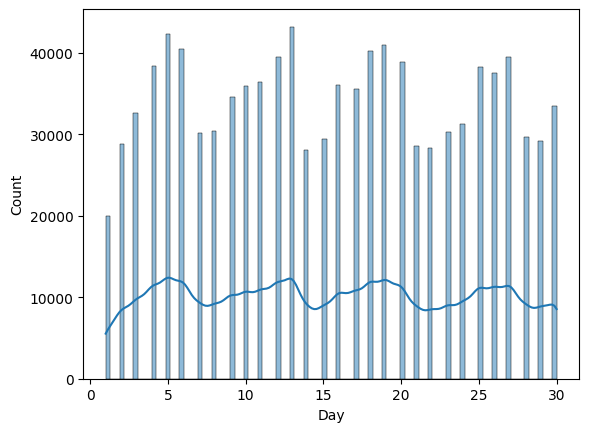

In [22]:
sns.histplot(data["Day"], kde=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6104\96630979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

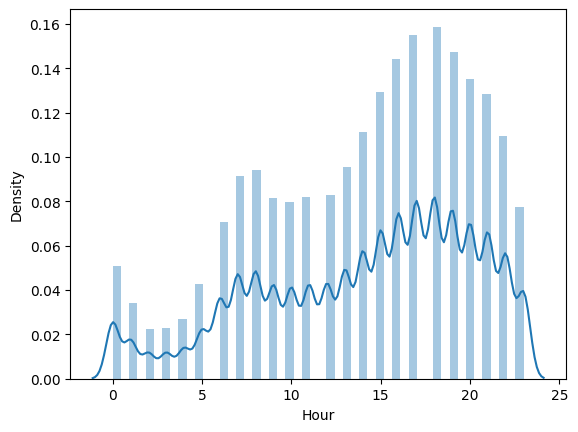

In [19]:
sns.distplot(data["Hour"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6104\2809950383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

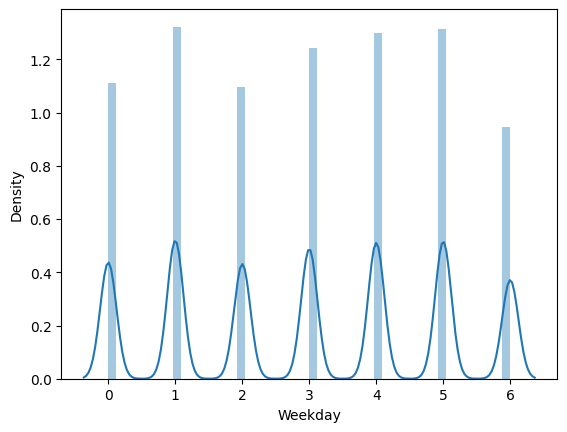

In [16]:
sns.distplot(data["Weekday"])

<Axes: xlabel='Hour', ylabel='Weekday'>

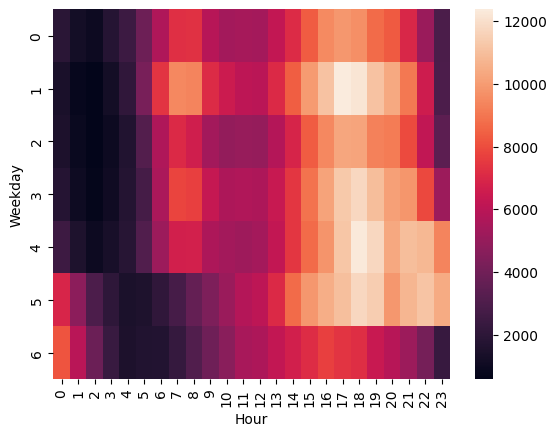

In [17]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


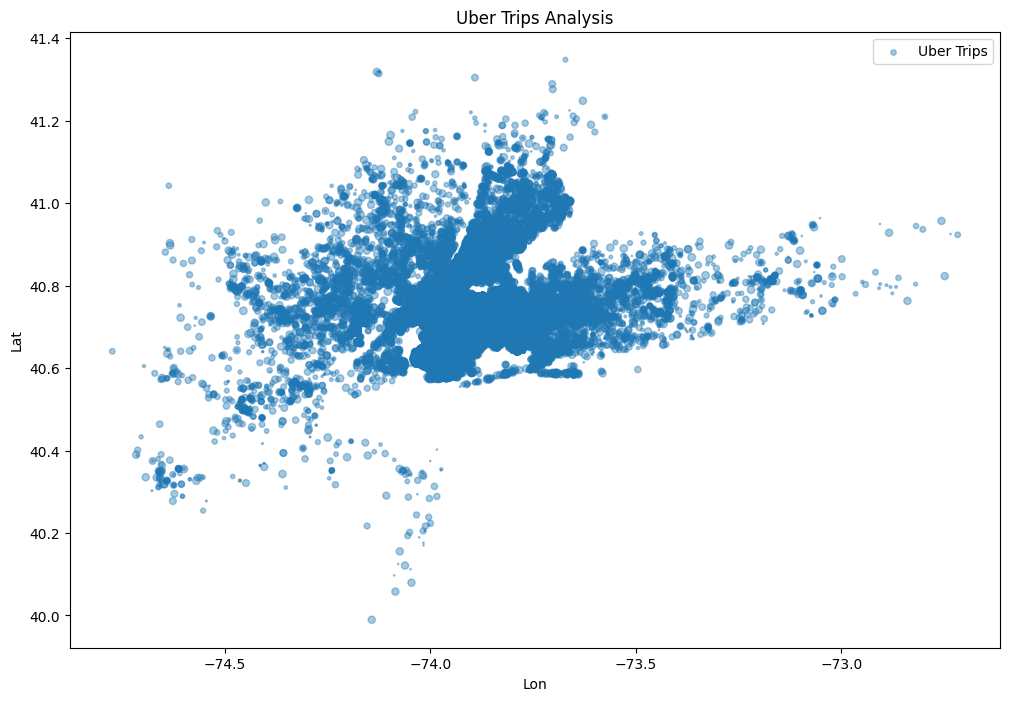

In [18]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()